In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r"C:\Users\bianc\OneDrive\Desktop\LICENȚĂ\Copie_Spotify_Merged_Final.csv")

In [7]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,date
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,0.814,2009-04-06
1,Movie,Martin & les fÃ©es,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,0.816,2015-10-27
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,0.368,2008-02-05
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,0.227,1905-06-20
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,0.390,2017-01-06


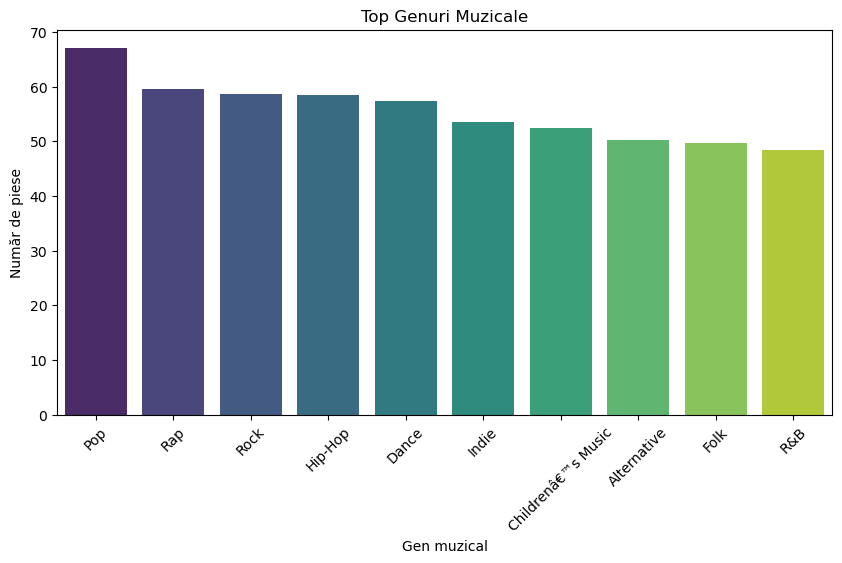

In [11]:
#Cele mai populare genuri muzicale
plt.figure(figsize=(10, 5))
sns.barplot(x=top_genres.index, y=top_genres.values, hue=top_genres.index, palette="viridis", legend=False)
plt.xticks(rotation=45)
plt.xlabel("Gen muzical")
plt.ylabel("Număr de piese")
plt.title("Top genuri muzicale")
plt.show()

In [18]:
#Clasificarea pieselor in functie de popularitate-criteriu Super Hit
conditions = [
    (df['popularity'] >= 80), 
    (df['popularity'] >= 50) & (df['popularity'] < 80),
    (df['popularity'] < 50)
]

categories = ['Super Hit', 'Popular', 'Less Known']

df['popularity_category'] = np.select(conditions, categories, default='Unknown')

#Filtrare + afișare rezultat final
super_hits = df[df['popularity_category'] == 'Super Hit'].sort_values(by='popularity', ascending=False)
super_hits[['track_name', 'genre', 'artist_name', 'popularity', 'popularity_category']].head(10)

,track_name,genre,artist_name,popularity,popularity_category
8877,7 rings,Dance,Ariana Grande,100,Super Hit
8876,"break up with your girlfriend, i'm bored",Dance,Ariana Grande,99,Super Hit
77398,Wow.,Rap,Post Malone,99,Super Hit
60536,Con Calma,Hip-Hop,Daddy Yankee,98,Super Hit
8887,Sweet but Psycho,Dance,Ava Max,97,Super Hit
8878,Without Me,Dance,Halsey,97,Super Hit
77399,Sunflower - Spider-Man: Into the Spider-Verse,Rap,Post Malone,97,Super Hit
87673,Calma - Remix,Pop,Pedro CapÃ³,97,Super Hit
87661,Happier,Pop,Marshmello,97,Super Hit
87660,Dancing With A Stranger (with Normani),Pop,Sam Smith,97,Super Hit


In [22]:
#Genurile cu cea mai mare creștere în popularitate
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

#Media popularității pe fiecare gen și an
genre_popularity = df.groupby(['genre', 'year'])['popularity'].mean().reset_index()

popularity_increase = genre_popularity.groupby('genre')['popularity'].agg(lambda x: x.max() - x.min()).reset_index()
popularity_increase = popularity_increase[~popularity_increase['genre'].str.startswith('Children')]

#top 10
top_genres_growth = popularity_increase.sort_values(by='popularity', ascending=False).head(10)
top_genres_growth

,genre,popularity
6,Classical,48.000000
21,Reggaeton,35.111111
25,Soundtrack,28.000000
15,Movie,27.431818
16,Opera,27.000000
14,Jazz,26.512438
9,Dance,26.339583
17,Pop,25.000000
26,World,25.000000
2,Anime,23.166667


In [24]:
#Cele mai populare piese din fiecare gen
#Grupare date după gen + piesa cu popularitatea maximă
most_popular_by_genre = df.loc[df.groupby('genre')['popularity'].idxmax()]

print(most_popular_by_genre[['genre', 'track_name', 'artist_name', 'popularity']])


                     genre                                    track_name  \
545              A Capella                          For the Longest Time   
661            Alternative                                     Sanctuary   
26357                Anime                                       Unravel   
43288                Blues                            Sweet Home Alabama   
64801     Children's Music                        Lullaby and Good Night   
70059   Childrenâ€™s Music  11 Minutes (with Halsey feat. Travis Barker)   
83965            Classical                              Olancha Farewell   
122736              Comedy                        From God's Perspective   
162398             Country                               Beautiful Crazy   
8877                 Dance                                       7 rings   
21172           Electronic                                   Bola Rebola   
38887                 Folk                                 Power Over Me   
60536       

In [30]:
top_artist = df.groupby(['artist_name', 'genre']).agg(
    nr_songs=('track_id', 'count'),
    average_popularity=('popularity', 'mean')
).reset_index()

top_artist = top_artist[top_artist['average_popularity'] > 75]

genre_counts = top_artist.groupby('genre').agg(
    nr_top_artists=('artist_name', 'count')
).reset_index()


genre_counts = genre_counts.sort_values(by='nr_top_artists', ascending=False)
print(genre_counts[['genre', 'nr_top_artists']])

                genre  nr_top_artists
4                 Pop              52
2             Hip-Hop              11
1               Dance               5
3               Indie               5
5                 Rap               5
6           Reggaeton               2
0  Childrenâ€™s Music               1


In [34]:
#Piesele cu tempo neobișnuit din fiecare gen 
percentiles = df.groupby('genre')['tempo'].quantile([0.05, 0.95]).unstack()
percentiles.columns = ['lower_bound', 'upper_bound']
spotify_with_percentiles = df.merge(percentiles, on='genre')

unusual_tempo_songs = spotify_with_percentiles[
    (spotify_with_percentiles['tempo'] < spotify_with_percentiles['lower_bound']) |
    (spotify_with_percentiles['tempo'] > spotify_with_percentiles['upper_bound'])
]


unusual_tempo_songs = unusual_tempo_songs[['track_name', 'artist_name', 'genre', 'tempo']]

print(unusual_tempo_songs)


                                               track_name         artist_name  \
1                        Perdu d'avance (par Gad Elmaleh)  Martin & les fÃ©es   
18                                                Veunise      Henri Salvador   
19                                   Ladies And Gentlemen              Amalya   
31      Une journÃ©e d'Ã©cole qui s'achÃ¨ve (par VÃ©ro...  Martin & les fÃ©es   
45                                  Penn Station - Seesaw            Ken Page   
...                                                   ...                 ...   
173935                                    Kimberly's Mine          Son Little   
173943                          I'm Cool - No Rap Version    Anthony Hamilton   
173956                                      Knock on Wood              cehryl   
173973                                         Work to Do  The Isley Brothers   
173985                                             P.O.P.               Belly   

        genre    tempo  
1 

In [38]:
#Artiștii cu cele mai multe hituri in top 10% cele mai populare piese
df['popularity_decile'] = pd.qcut(df['popularity'], q=10, labels=False, duplicates='drop')

#cele mai populare 10%
top_tracks = df[df['popularity_decile'] == 9] 

#Grupăm după artist și numărăm hiturile
top_artists = top_tracks.groupby('artist_name').size().reset_index(name='num_hits')

top_5_artists = top_artists.sort_values(by='num_hits', ascending=False).head(5)
print(top_5_artists)

      artist_name  num_hits
1007        Drake       149
1101       Eminem       101
3435  The Beatles        97
303           BTS        76
1869   Kanye West        73


In [40]:
#Corelatie intre parametrii tempo si energy
genre_avg = df.groupby('genre').agg(
    average_energy=('energy', 'mean'),
    average_tempo=('tempo', 'mean')
).reset_index()
genre_avg = genre_avg.sort_values(by='average_energy', ascending=False)
print(genre_avg)

                 genre  average_energy  average_tempo
23                 Ska        0.836548     130.866274
21           Reggaeton        0.748359     121.069793
10          Electronic        0.738945     125.903462
1          Alternative        0.713947     122.483087
5   Childrenâ€™s Music        0.712910     122.464607
9                Dance        0.695816     120.714865
7               Comedy        0.676276      98.231144
22                Rock        0.674920     122.824599
2                Anime        0.665141     126.547138
17                 Pop        0.659927     123.217036
12             Hip-Hop        0.645561     122.039203
8              Country        0.636081     123.716898
20              Reggae        0.635125     117.963793
19                 Rap        0.617233     121.029877
3                Blues        0.602340     121.055271
13               Indie        0.602075     120.728336
18                 R&B        0.554375     116.156551
24                Soul      

In [42]:
#Corelatie intre parametrii danceability si tempo
genre_avg = df.groupby('genre').agg(
    average_danceability=('danceability', 'mean'),
    average_tempo=('tempo', 'mean')
).reset_index()
genre_avg = genre_avg.sort_values(by='average_danceability', ascending=False)
print(genre_avg)

                 genre  average_danceability  average_tempo
21           Reggaeton              0.730070     121.069793
12             Hip-Hop              0.727604     122.039203
19                 Rap              0.704082     121.029877
20              Reggae              0.699400     117.963793
4     Children's Music              0.697324     121.080821
9                Dance              0.641908     120.714865
18                 R&B              0.638057     116.156551
10          Electronic              0.619041     125.903462
24                Soul              0.615964     115.676417
17                 Pop              0.604719     123.217036
14                Jazz              0.579747     111.628125
8              Country              0.575569     123.716898
13               Indie              0.574099     120.728336
7               Comedy              0.558768      98.231144
1          Alternative              0.541108     122.483087
3                Blues              0.52

In [44]:
#Corelatie intre parametrii valence si danceability
genre_avg = df.groupby('genre').agg(
    average_valence=('valence', 'mean'),
    average_danceability=('danceability', 'mean')
).reset_index()

genre_avg = genre_avg.sort_values(by='average_valence', ascending=False)
print(genre_avg)

                 genre  average_valence  average_danceability
20              Reggae         0.679576              0.699400
4     Children's Music         0.675520              0.697324
21           Reggaeton         0.659888              0.730070
23                 Ska         0.647538              0.510897
3                Blues         0.580511              0.529186
8              Country         0.535419              0.575569
9                Dance         0.517460              0.641908
22                Rock         0.514100              0.520392
14                Jazz         0.510414              0.579747
17                 Pop         0.505250              0.604719
24                Soul         0.483302              0.615964
12             Hip-Hop         0.462003              0.727604
13               Indie         0.452370              0.574099
1          Alternative         0.448835              0.541108
15               Movie         0.447975              0.491118
18      

In [ ]:
#Corelatie intre parametrii loudness si energy
filtered_df = spotify_df[~spotify_df['genre'].str.startswith('Children', na=False)]

genre_avg = filtered_df.groupby('genre').agg(
    average_loudness=('loudness', 'mean'),
    average_energy=('energy', 'mean')
).reset_index()

genre_avg = genre_avg.sort_values(by='average_loudness', ascending=False)
print(genre_avg)

In [46]:
#Speechiness vs genre
genre_speechiness = df.groupby('genre').agg(
    average_speechiness=('speechiness', 'mean')
).reset_index()

genre_speechiness = genre_speechiness.sort_values(by='average_speechiness', ascending=False)
print(genre_speechiness)

                 genre  average_speechiness
7               Comedy             0.854108
12             Hip-Hop             0.211582
19                 Rap             0.180201
21           Reggaeton             0.128223
18                 R&B             0.123245
4     Children's Music             0.117130
20              Reggae             0.116587
15               Movie             0.109525
10          Electronic             0.099632
1          Alternative             0.089268
23                 Ska             0.088228
9                Dance             0.085209
24                Soul             0.082369
17                 Pop             0.074372
14                Jazz             0.071811
5   Childrenâ€™s Music             0.071506
13               Indie             0.065262
2                Anime             0.065090
3                Blues             0.061994
16               Opera             0.059760
22                Rock             0.053250
6            Classical          

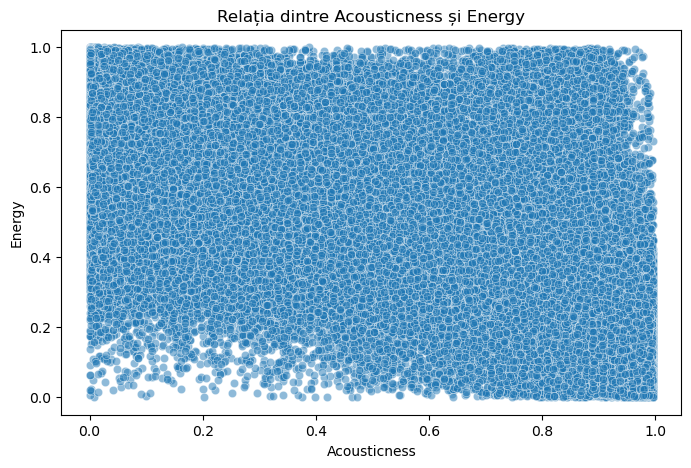

In [48]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='acousticness', y='energy', alpha=0.5)

# Adăugăm titlu și etichete
plt.title("Relația dintre Acousticness și Energy")
plt.xlabel("Acousticness")
plt.ylabel("Energy")
plt.show()

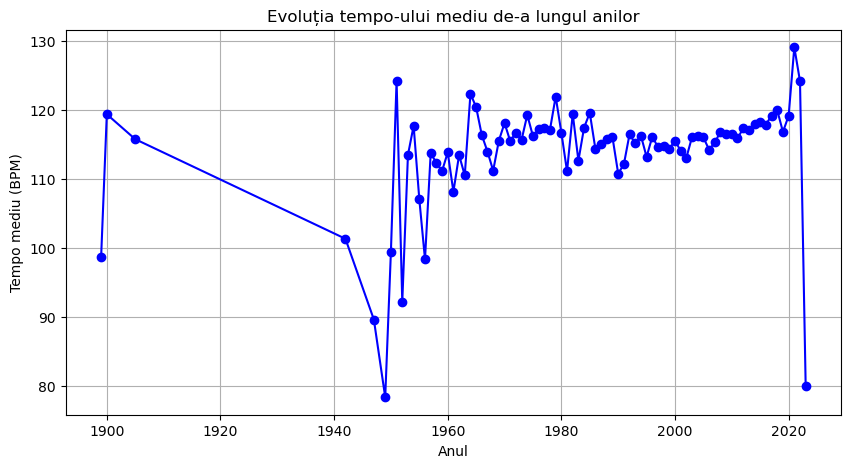

In [52]:

df['year'] = pd.to_numeric(df['year'], errors='coerce')
tempo_trend = df.groupby('year')['tempo'].mean().reset_index()

# Creăm graficul
plt.figure(figsize=(10, 5))
plt.plot(tempo_trend['year'], tempo_trend['tempo'], marker='o', linestyle='-', color='b')

# Adăugăm titlu și etichete
plt.title("Evoluția tempo-ului mediu de-a lungul anilor")
plt.xlabel("Anul")
plt.ylabel("Tempo mediu (BPM)")
plt.grid(True)

# Afișăm graficul
plt.show()


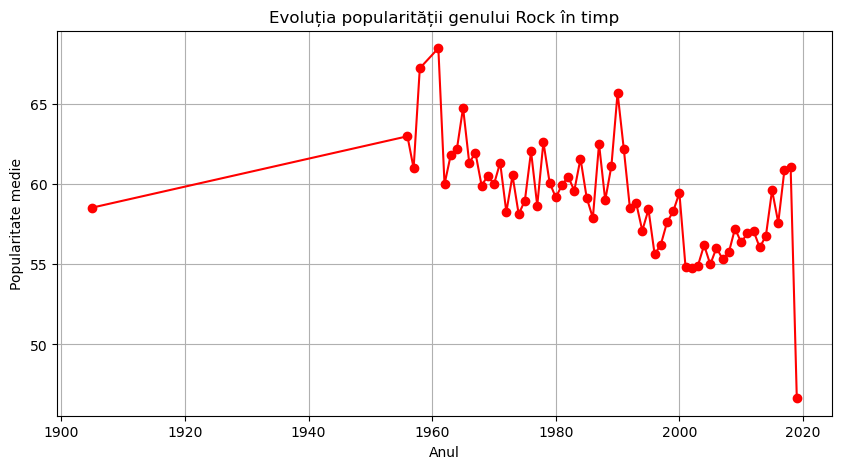

In [56]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Filtrăm doar piesele din genul Rock
rock_df = df[df['genre'].str.contains('Rock', case=False, na=False)]

# Calculăm popularitatea medie a genului Rock pe fiecare an
rock_trend = rock_df.groupby('year')['popularity'].mean().reset_index()

# Creăm graficul
plt.figure(figsize=(10, 5))
plt.plot(rock_trend['year'], rock_trend['popularity'], marker='o', linestyle='-', color='r')

# Adăugăm titlu și etichete
plt.title("Evoluția popularității genului Rock în timp")
plt.xlabel("Anul")
plt.ylabel("Popularitate medie")
plt.grid(True)

# Afișăm graficul
plt.show()

In [62]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Creăm o nouă coloană pentru deceniu
df['decade'] = (df['year'] // 10) * 10

# Calculăm popularitatea medie pentru fiecare gen în fiecare deceniu
decade_genre_popularity = df.groupby(['decade', 'genre'])['popularity'].mean().reset_index()

# Găsim genul cel mai popular din fiecare deceniu
top_genres_per_decade = decade_genre_popularity.loc[
    decade_genre_popularity.groupby('decade')['popularity'].idxmax()
]

# Afișăm rezultatul
print(top_genres_per_decade)

     decade  genre  popularity
0      1890  Blues   30.000000
18     1900    Pop   65.442105
29     1940   Jazz   36.500000
38     1950   Rock   64.857143
52     1960    Pop   71.200000
73     1970    Pop   68.333333
96     1980    Pop   70.947368
121    1990    Pop   68.212500
148    2000    Pop   65.793706
175    2010    Pop   67.231174
189    2020    Pop   64.000000


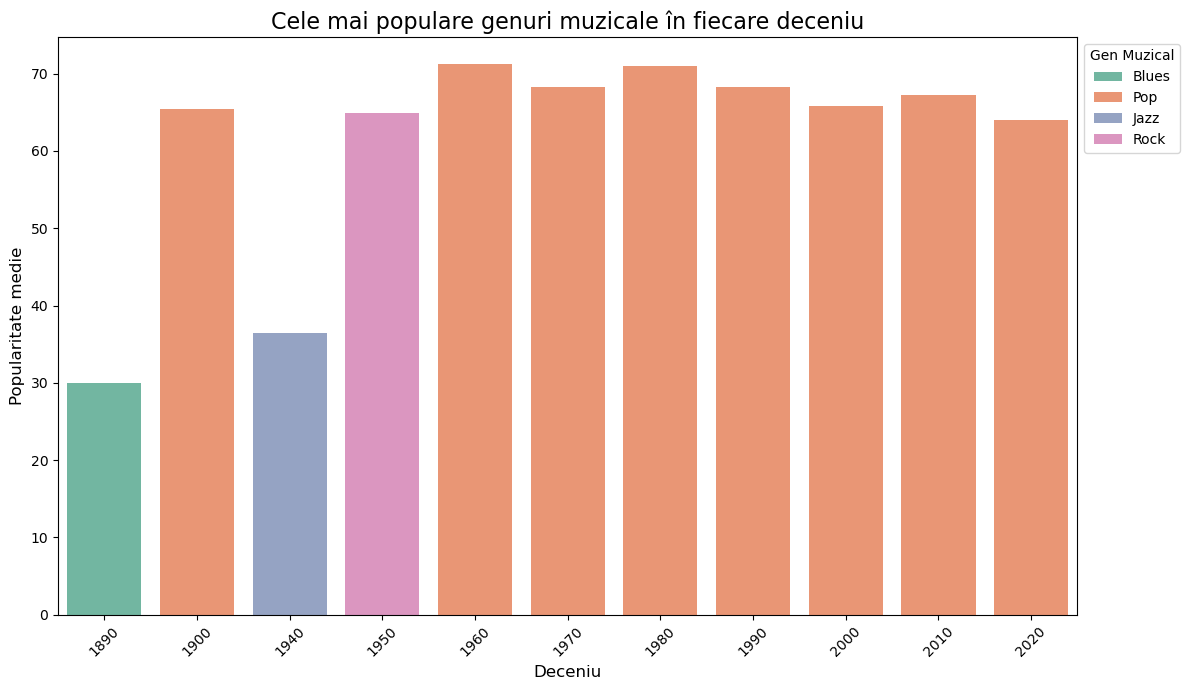

In [66]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Creăm o nouă coloană pentru deceniu
df['decade'] = (df['year'] // 10) * 10

# Calculăm popularitatea medie pentru fiecare gen în fiecare deceniu
decade_genre_popularity = df.groupby(['decade', 'genre'])['popularity'].mean().reset_index()

# Găsim genul cel mai popular din fiecare deceniu
top_genres_per_decade = decade_genre_popularity.loc[
    decade_genre_popularity.groupby('decade')['popularity'].idxmax()
]

# Creăm un grafic frumos folosind Seaborn
plt.figure(figsize=(12, 7))
sns.barplot(data=top_genres_per_decade, x='decade', y='popularity', hue='genre', palette='Set2')

# Adăugăm titlu și etichete
plt.title("Cele mai populare genuri muzicale în fiecare deceniu", fontsize=16)
plt.xlabel("Deceniu", fontsize=12)
plt.ylabel("Popularitate medie", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Gen Muzical', loc='upper left', bbox_to_anchor=(1, 1))

# Arătăm graficul
plt.tight_layout()
plt.show()

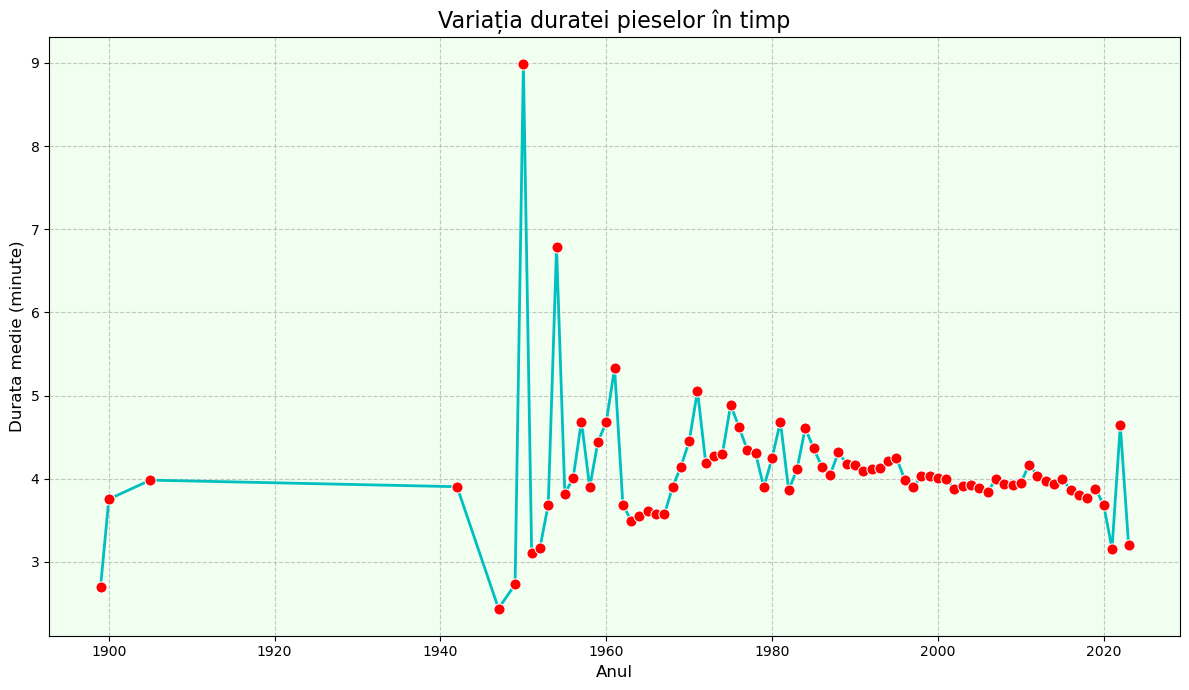

In [68]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['duration_ms'] = pd.to_numeric(df['duration_ms'], errors='coerce')

# Convertim durata în minute
df['duration_min'] = df['duration_ms'] / 60000

# Calculăm durata medie pe fiecare an
duration_trend = df.groupby('year')['duration_min'].mean().reset_index()

# Creăm graficul folosind Seaborn
plt.figure(figsize=(12, 7))
sns.lineplot(data=duration_trend, x='year', y='duration_min', marker='o', color='c', linewidth=2, markerfacecolor='red', markersize=8)

# Adăugăm titlu și etichete
plt.title("Variația duratei pieselor în timp", fontsize=16)
plt.xlabel("Anul", fontsize=12)
plt.ylabel("Durata medie (minute)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Colorează fundalul graficului
plt.gca().set_facecolor('honeydew')

# Afișăm graficul
plt.tight_layout()
plt.show()

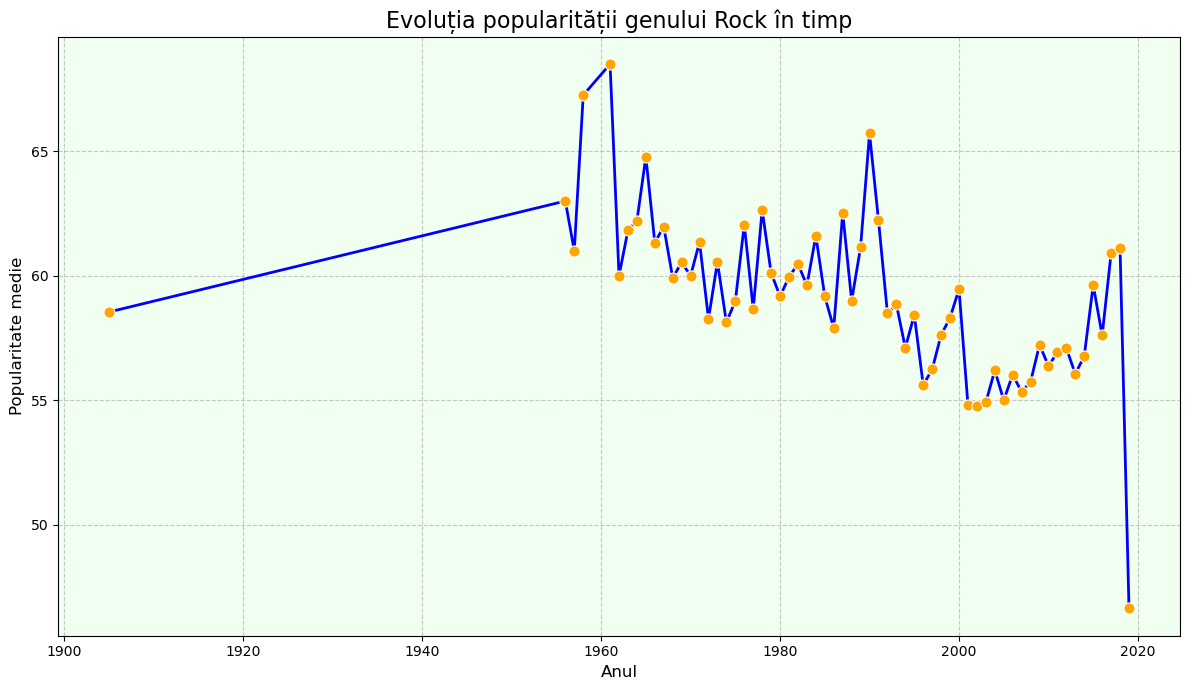

In [70]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Filtrăm doar piesele din genul dorit (exemplu: Rock)
rock_df = df[df['genre'].str.contains('Rock', case=False, na=False)]

# Calculăm popularitatea medie a pieselor Rock pe fiecare an
rock_popularity_trend = rock_df.groupby('year')['popularity'].mean().reset_index()

# Creăm graficul cu Seaborn
plt.figure(figsize=(12, 7))
sns.lineplot(data=rock_popularity_trend, x='year', y='popularity', marker='o', color='b', linewidth=2, markerfacecolor='orange', markersize=8)

# Adăugăm titlu și etichete
plt.title("Evoluția popularității genului Rock în timp", fontsize=16)
plt.xlabel("Anul", fontsize=12)
plt.ylabel("Popularitate medie", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Colorează fundalul graficului
plt.gca().set_facecolor('honeydew')

# Afișăm graficul
plt.tight_layout()
plt.show()